In [6]:
import gfootball.env as football_env
from gfootball.env import football_action_set
env = football_env.create_environment(
    env_name='academy_3_vs_1_with_keeper', 
    stacked=False,                           # solo estado, no pixeles 
    representation='simple115',              # solo estado, no pixeles 
    with_checkpoints=True,                   # recompensas intermedias, no solo al marcar 
    render=True)       
football_action_set.action_set_dict['default']
import sys
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import logging, os
logging.disable(logging.WARNING)
from dqn_agent import Agent
agent = Agent(state_size=115, action_size=21, seed=0)
from gfootball.env import scenario_builder
scenario_builder.all_scenarios()

['11_vs_11_easy_stochastic',
 '11_vs_11_hard_stochastic',
 '11_vs_11_stochastic',
 'academy_3_vs_1_with_keeper',
 'academy_corner',
 'academy_counterattack_easy',
 'academy_counterattack_hard',
 'academy_empty_goal',
 'academy_empty_goal_close',
 'academy_pass_and_shoot_with_keeper',
 'academy_run_pass_and_shoot_with_keeper',
 'academy_run_to_score',
 'academy_run_to_score_with_keeper',
 'academy_single_goal_versus_lazy',
 'test_example_multiagent']

Episodio 50	Puntuacion media (50 anteriores): 0.75
Episodio 100	Puntuacion media (50 anteriores): 0.69


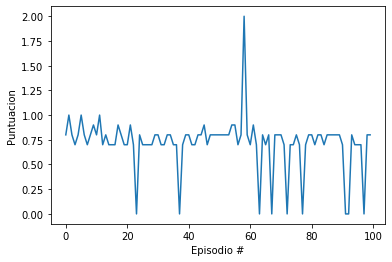

In [3]:
def dqn(n_episodes=100, batch_length=50, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): numero maximo de episodios de entrenamiento (n_episodios)
        max_t (int): numero maximo de pasos por episodio (n_entrenamiento)
        eps_start (float): valor inicial de epsilon
        eps_end (float): valor final de epsilon
        eps_decay (float): factor de multiplicacion (por episodio) de epsilon
    """
    agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))
    scores = []                        # puntuaciones de cada episodio
    scores_window = deque(maxlen=batch_length)  # puntuaciones de los ultimos 100 episodios
    mean_scores = []
    eps = eps_start                    # inicializar epsilon
    promedio = 0
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        acc_reward = 0
        while True:
            
            # elegir accion At con politica e-greedy
            action = agent.act(state, eps)
            
            # aplicar At y obtener Rt+1, St+1
            observation, reward, done, info = env.step(action)
            
            # almacenar <St, At, Rt+1, St+1>
            agent.memory.add(state, action, reward, observation, done)
            
            # train & update
            agent.step(state, action, reward, observation, done)
            
            acc_reward += reward 
            
            if done:
                break 

        scores_window.append(acc_reward)       # guardar ultima puntuacion
        scores.append(acc_reward)              # guardar ultima puntuacion
        eps = max(eps_end, eps_decay*eps) # reducir epsilon
        if len(scores_window)==batch_length:
            promedio = np.mean(scores_window) 
        mean_scores.append(promedio)
        
        print('\rEpisodio {}\tPuntuacion media (ultimos {:d}): {:.2f}'.format(i_episode, batch_length, np.mean(scores_window)), end="")
        if i_episode % batch_length == 0:
            print('\rEpisodio {}\tPuntuacion media ({:d} anteriores): {:.2f}'.format(i_episode, batch_length, np.mean(scores_window)))
        if len(scores_window)==batch_length and promedio >= max(mean_scores):
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
#         if np.mean(scores_window)>=1.90:
#             print('\nProblema resuelto en {:d} episodios!\tPuntuacion media (ultimos {:d}): {:.2f}'.format(i_episode-50, 50, np.mean(scores_window)))
#             torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth') # guardar pesos de agente entrenado
#             break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Puntuacion')
plt.xlabel('Episodio #')
plt.show()

## Agente entrenado
Implementación del agente entrenado durante 50 episodios.

In [3]:
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

scores = []                        # puntuaciones de cada episodio

for i_episode in range(1, 51):
    state = env.reset()
    acc_reward = 0
    while True:
        # elegir accion At con politica e-greedy
        action = agent.act(state, 0.0)

        # aplicar At y obtener Rt+1, St+1
        observation, reward, done, info = env.step(action)
        
        acc_reward += reward
       
        if done:
            break 
            
    scores.append(acc_reward)              # guardar ultima puntuacion
    print('\rEpisodio {}\tPuntuacion media: {:.2f}'.format(i_episode, np.mean(scores)), end="")
        
env.close()

print('\npuntuación media final: %f' %np.mean(scores))

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, '.')
plt.ylabel('Puntuacion')
plt.xlabel('Episodio #')
plt.show()


Episodio 1	Puntuacion media: 2.00

KeyboardInterrupt: 